In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import datetime
import itertools
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime 
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, LSTM
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df1 =  pd.read_csv('prices-split-adjusted.csv',index_col = 0)
df1.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df1.shape

(851264, 6)

In [4]:
df1.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [6]:
df1.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df2 = pd.read_csv('fundamentals.csv',index_col=0)
df2.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [8]:
df2.shape

(1781, 78)

In [9]:
df2.isnull().sum()

Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 78, dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
Ticker Symbol                                          1781 non-null object
Period Ending                                          1781 non-null object
Accounts Payable                                       1781 non-null float64
Accounts Receivable                                    1781 non-null float64
Add'l income/expense items                             1781 non-null float64
After Tax ROE                                          1781 non-null float64
Capital Expenditures                                   1781 non-null float64
Capital Surplus                                        1781 non-null float64
Cash Ratio                                             1482 non-null float64
Cash and Cash Equivalents                              1781 non-null float64
Changes in Inventories                                 1781 non-null float64
Common Stocks                                   

In [11]:
df2.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [12]:
data = df1[df1.symbol =='AAPL']
data

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...
2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0


In [13]:
data.drop('symbol',axis=1,inplace=True)

In [14]:
data.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


In [15]:
data.shape

(1762, 5)

In [16]:
data.tail()

,open,close,low,high,volume
date,,,,,
2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,117.519997,116.760002,116.199997,118.019997,20905900.0
2016-12-29,116.449997,116.730003,116.400002,117.110001,15039500.0
2016-12-30,116.650002,115.820000,115.430000,117.199997,30586300.0


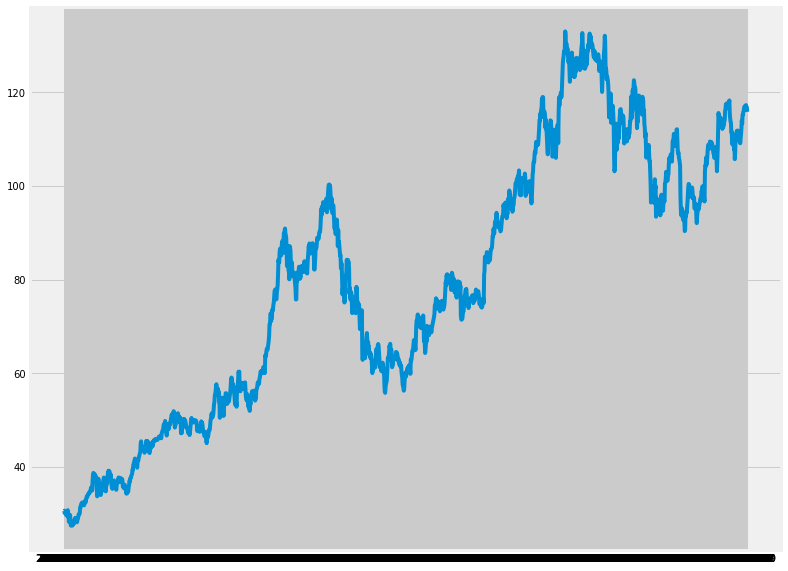

In [17]:
plt.figure(figsize =(12,10))
plt.plot(data.close)

In [18]:
data.date = data.index

In [19]:
data.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


In [20]:
data.date.dtype

dtype('O')

In [21]:
data.date = pd.to_datetime(data.date)

In [22]:
data.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


In [23]:
dataset = data['close'].values

In [24]:
dataset = np.array(dataset).reshape(-1,1)

In [25]:
sc  = MinMaxScaler(feature_range=(0, 1))
dataset = sc.fit_transform(dataset)
dataset[:10]

array([[0.02971784],
       [0.03021854],
       [0.02560389],
       [0.02507612],
       [0.0269707 ],
       [0.02444008],
       [0.02120576],
       [0.02517085],
       [0.02351986],
       [0.0187834 ]])

In [26]:
# Split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size: len(dataset),:]
print(len(train),len(test))

1233 529


I set the look back date as 10 days, which is the number of previous time steps to use as input variables to predict the next time period

In [27]:
# convert an array of value
def create_dataset(S, look_back=15):
    dataX, dataY = [], []
    for i in range(len(S)-look_back-1):
        dataX.append(S[i:(i+look_back), 0])
        dataY.append(S[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
xtrain,ytrain = create_dataset(train, look_back=15)
xtrain.shape,ytrain.shape

((1217, 15), (1217,))

In [29]:
xtest,ytest = create_dataset(test, look_back = 15)
xtest.shape,ytest.shape

((513, 15), (513,))

In [30]:
xtrain = np.reshape(xtrain,(xtrain.shape[0], 1, xtrain.shape[1]))
xtest = np.reshape(xtest,(xtest.shape[0], 1, xtest.shape[1]))
xtrain.shape,xtest.shape


((1217, 1, 15), (513, 1, 15))

In [31]:
look_back = 15

# Building LSTM Network
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain, epochs =  100, batch_size = 1, verbose = 1)

Epoch 1/100
1217/1217 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 2/100
1217/1217 [==============================] - 4s 3ms/step - loss: 5.2128e-04
Epoch 3/100
1217/1217 [==============================] - 4s 4ms/step - loss: 4.3688e-04
Epoch 4/100
1217/1217 [==============================] - 4s 4ms/step - loss: 3.5647e-04
Epoch 5/100
1217/1217 [==============================] - 4s 4ms/step - loss: 3.2694e-04
Epoch 6/100
1217/1217 [==============================] - 4s 4ms/step - loss: 3.0960e-04
Epoch 7/100
1217/1217 [==============================] - 4s 4ms/step - loss: 2.9233e-04
Epoch 8/100
1217/1217 [==============================] - 5s 4ms/step - loss: 2.9081e-04
Epoch 9/100
1217/1217 [==============================] - 4s 4ms/step - loss: 2.3692e-04
Epoch 10/100
1217/1217 [==============================] - 5s 4ms/step - loss: 2.5362e-04
Epoch 11/100
1217/1217 [==============================] - 5s 4ms/step - loss: 2.5638e-04
Epoch 12/100
1217/1217 [==========

1217/1217 [==============================] - 4s 3ms/step - loss: 1.5901e-04
Epoch 93/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.6803e-04
Epoch 94/100
1217/1217 [==============================] - 4s 3ms/step - loss: 1.5504e-04
Epoch 95/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.5731e-04
Epoch 96/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.6034e-04
Epoch 97/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.6653e-04
Epoch 98/100
1217/1217 [==============================] - 4s 3ms/step - loss: 1.6935e-04
Epoch 99/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.7240e-04
Epoch 100/100
1217/1217 [==============================] - 4s 4ms/step - loss: 1.6370e-04


In [32]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)
pred[:10]

array([[107.414345],
       [108.67893 ],
       [111.42145 ],
       [111.70688 ],
       [112.67992 ],
       [112.56975 ],
       [112.10132 ],
       [113.37588 ],
       [113.55486 ],
       [112.54084 ]], dtype=float32)

In [33]:
ytest =  np.array(ytest).reshape(-1,1)
ytest = sc.inverse_transform(ytest)
ytest[:10]

array([[109.410004],
       [112.650002],
       [111.779999],
       [112.940002],
       [112.540001],
       [112.010002],
       [113.989998],
       [113.910004],
       [112.519997],
       [110.379997]])

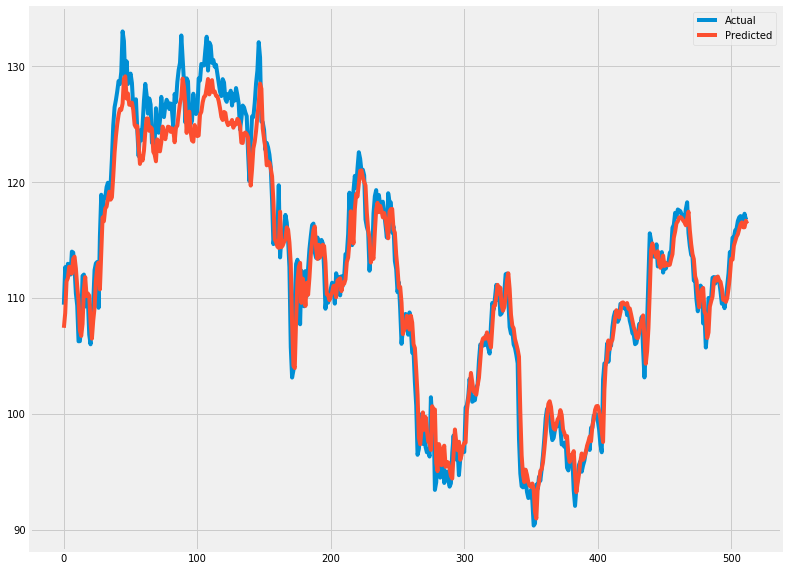

In [34]:
plt.figure(figsize =(12,10))
plt.plot(ytest,label ='Actual')
plt.plot(pred, label='Predicted')
plt.legend()